# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [176]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from random import uniform
from citipy import citipy
from datetime import datetime
import seaborn as sns
import urllib
from urllib.error import HTTPError
from datetime import datetime



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [175]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []
cloudiness = []
dt = []
temp = []
humidity = []
wind = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [177]:
api_key

'9be9daa77944427737375d79428d57be'

In [178]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [179]:
print("Beginning Data Retrival")
print("------------------------------")
i = 1
j = 1
weather_df = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    response = requests.get(query_url + city)
    response_json = response.json()
    
    if response.status_code == 200:
        weather_df["City"].append(city)
        weather_df["Cloudiness"].append(response_json['clouds']['all'])
        weather_df["Country"].append(response_json['sys']['country'])
        weather_df["Date"].append(response_json['dt'])
        weather_df["Humidity"].append(response_json['main']['humidity'])
        weather_df["Lat"].append(response_json['coord']['lat'])
        weather_df["Lng"].append(response_json['coord']['lon'])
        weather_df["Max Temp"].append(response_json['main']['temp_max'])
        weather_df["Wind Speed"].append(response_json['wind']['speed'])
        if j <= 50:
            print(f"Processing Record {j} of Set {i} | {city}")
            j = j + 1 
        else:
            j = 0
            i = i + 1
            print(f"Processing Record {j} of Set {i} | {city}")
            j = j + 1
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | balabac
City not found. Skipping...
Processing Record 2 of Set 1 | carson city
City not found. Skipping...
Processing Record 3 of Set 1 | uarini
City not found. Skipping...
Processing Record 4 of Set 1 | arraial do cabo
City not found. Skipping...
Processing Record 5 of Set 1 | anloga
City not found. Skipping...
Processing Record 6 of Set 1 | bluff
City not found. Skipping...
Processing Record 7 of Set 1 | mattawa
City not found. Skipping...
Processing Record 8 of Set 1 | dasoguz
City not found. Skipping...
Processing Record 9 of Set 1 | jinchang
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 11 of Set 1 | iqaluit
City not found. Skipping...
Processing Record 12 of Set 1 | geraldton
City not found. Skipping...
Processing Record 13 of Set 1 | la ronge
City not found. Skipping...
Processing Record 14 of Set 1 | severo-kurilsk
City n

Processing Record 16 of Set 3 | oruro
City not found. Skipping...
Processing Record 17 of Set 3 | ornskoldsvik
City not found. Skipping...
Processing Record 18 of Set 3 | pisco
City not found. Skipping...
Processing Record 19 of Set 3 | tiksi
City not found. Skipping...
Processing Record 20 of Set 3 | aswan
City not found. Skipping...
Processing Record 21 of Set 3 | jamestown
City not found. Skipping...
Processing Record 22 of Set 3 | deqing
City not found. Skipping...
Processing Record 23 of Set 3 | hermanus
City not found. Skipping...
Processing Record 24 of Set 3 | alexandria
City not found. Skipping...
Processing Record 25 of Set 3 | airai
City not found. Skipping...
Processing Record 26 of Set 3 | sacama
City not found. Skipping...
Processing Record 27 of Set 3 | kruisfontein
City not found. Skipping...
Processing Record 28 of Set 3 | methoni
City not found. Skipping...
Processing Record 29 of Set 3 | arman
City not found. Skipping...
Processing Record 30 of Set 3 | brae
City not 

Processing Record 34 of Set 5 | rio gallegos
City not found. Skipping...
Processing Record 35 of Set 5 | saskylakh
City not found. Skipping...
Processing Record 36 of Set 5 | sao jose da coroa grande
City not found. Skipping...
Processing Record 37 of Set 5 | big rapids
City not found. Skipping...
Processing Record 38 of Set 5 | puerto el triunfo
City not found. Skipping...
Processing Record 39 of Set 5 | kerman
City not found. Skipping...
Processing Record 40 of Set 5 | riyadh
City not found. Skipping...
Processing Record 41 of Set 5 | pimentel
City not found. Skipping...
Processing Record 42 of Set 5 | mosquera
City not found. Skipping...
Processing Record 43 of Set 5 | katobu
City not found. Skipping...
Processing Record 44 of Set 5 | yar-sale
City not found. Skipping...
Processing Record 45 of Set 5 | seymchan
City not found. Skipping...
Processing Record 46 of Set 5 | fairbanks
City not found. Skipping...
Processing Record 47 of Set 5 | san jose
City not found. Skipping...
Process

Processing Record 2 of Set 8 | praia
City not found. Skipping...
Processing Record 3 of Set 8 | buta
City not found. Skipping...
Processing Record 4 of Set 8 | stromness
City not found. Skipping...
Processing Record 5 of Set 8 | yeppoon
City not found. Skipping...
Processing Record 6 of Set 8 | bom jesus
City not found. Skipping...
Processing Record 7 of Set 8 | kedrovyy
City not found. Skipping...
Processing Record 8 of Set 8 | chunoyar
City not found. Skipping...
Processing Record 9 of Set 8 | samarai
City not found. Skipping...
Processing Record 10 of Set 8 | nabire
City not found. Skipping...
Processing Record 11 of Set 8 | providencia
City not found. Skipping...
Processing Record 12 of Set 8 | nanzhang
City not found. Skipping...
Processing Record 13 of Set 8 | cravo norte
City not found. Skipping...
Processing Record 14 of Set 8 | coquimbo
City not found. Skipping...
Processing Record 15 of Set 8 | baoqing
City not found. Skipping...
Processing Record 16 of Set 8 | bani walid
Cit

Processing Record 21 of Set 10 | muros
City not found. Skipping...
Processing Record 22 of Set 10 | irricana
City not found. Skipping...
Processing Record 23 of Set 10 | jennings
City not found. Skipping...
Processing Record 24 of Set 10 | esso
City not found. Skipping...
Processing Record 25 of Set 10 | atambua
City not found. Skipping...
Processing Record 26 of Set 10 | bar harbor
City not found. Skipping...
Processing Record 27 of Set 10 | kindu
City not found. Skipping...
Processing Record 28 of Set 10 | walvis bay
City not found. Skipping...
Processing Record 29 of Set 10 | buala
City not found. Skipping...
Processing Record 30 of Set 10 | ranipur
City not found. Skipping...
Processing Record 31 of Set 10 | atasu
City not found. Skipping...
Processing Record 32 of Set 10 | tigil
City not found. Skipping...
Processing Record 33 of Set 10 | tiznit
City not found. Skipping...
Processing Record 34 of Set 10 | vila velha
City not found. Skipping...
Processing Record 35 of Set 10 | leni

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [180]:
weather_df = pd.DataFrame(weather_df)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,balabac,65,PH,1557012242,66,7.99,117.06,86.54,7.40
1,carson city,1,US,1557012097,9,39.16,-119.77,79.00,13.87
2,uarini,40,BR,1557009900,94,-2.98,-65.16,78.80,3.36
3,arraial do cabo,20,BR,1557007200,78,-22.97,-42.02,78.80,9.17
4,anloga,20,GH,1557010800,94,5.79,0.90,78.80,3.24


In [150]:
weather_df.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [151]:
# convert data to csv
weather_df.to_csv('weather_df.csv', encoding='utf-8', index=False)

In [152]:
weather_df.shape

(521, 9)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

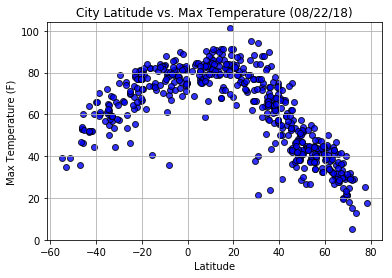

In [153]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

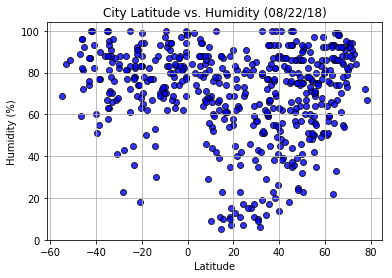

In [147]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

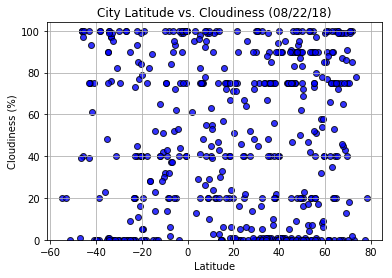

In [154]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

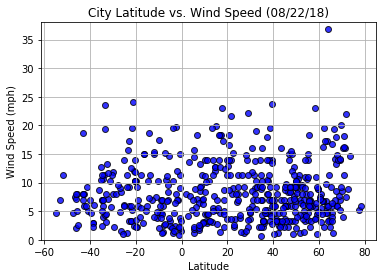

In [155]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,38)
plt.grid(True)

plt.savefig("LatVsWindSpeed.png")
plt.show()